Bulls.csv 는 경매시장에서 거래된 76마리의 어린(2살 이하) 황소의 특성과 거래가격(SalePr)에 관한 자료이다. 변수 설명은 아래와 같다.
-	Breed=1 if Angus, 5 if Hereford, 8 if Simental
-	FtFrBody=fat free body (pounds)
-	Frame=Scale from 1(small) to 8 (large)
-	SaleHt=Sale height at shoulder (inches)
-	YrHgt=Yearling height at shoulder (inches)
-	PrctFFB=Percent fat-free body
-	BkFat=Back fat (inches)
-	SaleWt=Sale weight (pounds)

SalePr와 Breed 변수를 제외한 7개의 변수의 상관계수 행렬을 사용하여 주성분분석을 시행하고 아래의 질문에 답하시오. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA # 주성분 분석
from sklearn.preprocessing import StandardScaler # 표준화

data_path = '../data/'

In [2]:
data = pd.read_csv(data_path + 'bulls.csv')

1. 각 주성분의 분산을 사용하여 scree plot을 그리고 누적분산 설명비율을 계산하시오. 적절한 주성분의 개수는 무엇인가? 

In [3]:
X = data.iloc[:,2:]
X.head()

,YrHgt,FtFrBody,PrctFFB,Frame,BkFat,SaleHt,SaleWt
0,51.0,1128,70.9,7,0.25,54.8,1720
1,51.9,1108,72.1,7,0.25,55.3,1575
2,49.9,1011,71.6,6,0.15,53.1,1410
3,53.1,993,68.9,8,0.35,56.4,1595
4,51.2,996,68.6,7,0.25,55.0,1488


In [4]:
X_scale = StandardScaler().fit_transform(X)

In [5]:
X_scale.shape

(76, 7)

In [6]:
pca = PCA().fit(X_scale)

In [7]:
np.cumsum(pca.explained_variance_ratio_)

array([0.58867113, 0.7796896 , 0.8856014 , 0.945805  , 0.9723487 ,
       0.99327761, 1.        ])

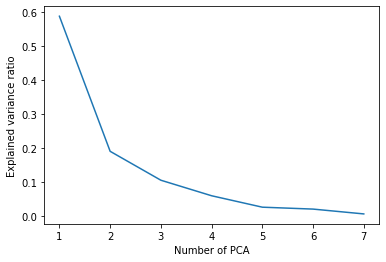

In [8]:
plt.plot(np.arange(1,X_scale.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()

7개의 변수를 2개의 주성분점수로 축약할 때, 총분산의 약 80% 설명가능하고, 엘보우 포인트 역시 주성분 개수가 2일 때 존재하므로, 상관계수행렬을 이용한 pca는 pc2까지 선택하는 것이 좋다.

답) 70%이상을 가지는 최소 dimension은 2개

In [9]:
pca.explained_variance_

array([4.17564057, 1.35495769, 0.75126765, 0.42704422, 0.18828334,
       0.14845573, 0.04768413])

#### lambda의 값 (pca.explained_variance_) 고유벡터의 값을 기준으로
- 1보다 큰 것을 기준으로 하면 2개
- 0.7보다 큰 것을 기준으로 하면 3개

2.	첫 두 개의 주성분을 계산하는데 사용된 rotation값을 찾으시오.

In [10]:
pca.components_[0], pca.components_[1]

(array([ 0.44993132,  0.41232559,  0.35556181,  0.4339569 , -0.1867048 ,
         0.45285382,  0.26994696]),
 array([-0.04279022,  0.12983655, -0.31550779,  0.00772821,  0.71471936,
         0.10131509,  0.60051483]))

In [11]:
pd.DataFrame(pca.components_, index = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'],
            columns=X.columns)[:2]

,YrHgt,FtFrBody,PrctFFB,Frame,BkFat,SaleHt,SaleWt
PC1,0.449931,0.412326,0.355562,0.433957,-0.186705,0.452854,0.269947
PC2,-0.042790,0.129837,-0.315508,0.007728,0.714719,0.101315,0.600515


In [12]:
pca.components_[0]

array([ 0.44993132,  0.41232559,  0.35556181,  0.4339569 , -0.1867048 ,
        0.45285382,  0.26994696])

In [13]:
pca.components_[1]

array([-0.04279022,  0.12983655, -0.31550779,  0.00772821,  0.71471936,
        0.10131509,  0.60051483])

3.	각 주성분의 rotation값을 barplot을 사용해 비교하고 주성분의 의미를 해석하시오.

In [14]:
data.columns[2:]

Index(['YrHgt', 'FtFrBody', 'PrctFFB', 'Frame', 'BkFat', 'SaleHt', 'SaleWt'], dtype='object')

#### PC1

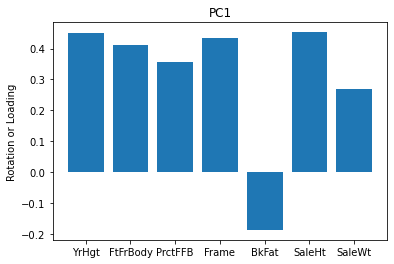

In [15]:
plt.bar(x=data.columns[2:], height=pca.components_[0])
plt.title('PC1')
plt.ylabel('Rotation or Loading')
plt.show()

대부분의 변수가 영향을 주며, SaleWt와 BkFat 영향은 다른 변수에 비해 적다, 또한 BkFat은 음의 영향을 준다.

#### PC2

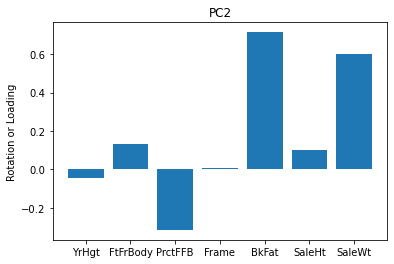

In [16]:
plt.bar(x=data.columns[2:], height=pca.components_[1])
plt.title('PC2')
plt.ylabel('Rotation or Loading')
plt.show()

BkFat과 SaleWt가 가장 큰 영향을 미치고, 나머지 변수는 큰 영향을 주지 않으며, PrctFFB는 음의 영향을 준다

4.	행렬도를 사용해 원변수와 주성분의 관계, 원변수 간의 상관관계, 특이한 관측치의 존재 유무 등을 파악하고 설명하시오. 

In [17]:
def biplot(score,coeff, labels=None, index = X.index):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    for i in range(score.shape[0]):
        if index is None:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], str(i))
        else:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], index[i])

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

In [18]:
x_reduced = pca.transform(X_scale)

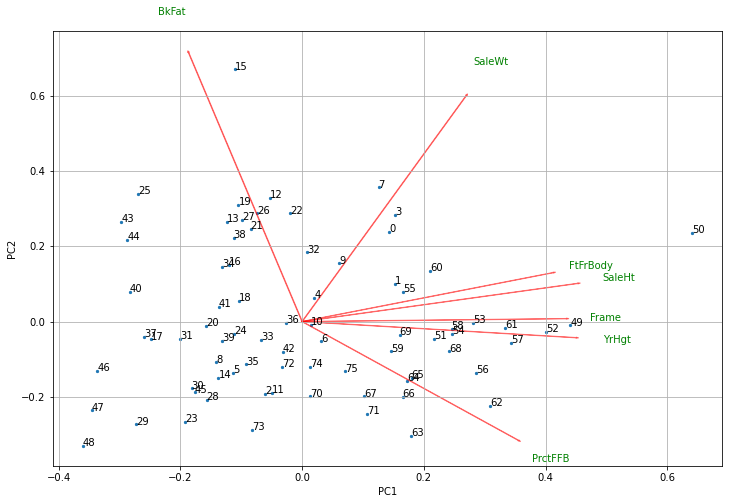

In [19]:
plt.figure(figsize=(12,8))
biplot(x_reduced[:,0:2],np.transpose(pca.components_[0:2, :]), X.columns )

벡터의 길이는 분산 -> 표준화하고 진행했으면 분산은 1로 동일한데 왜 길이가 다른가
- PC1, PC2 축으로만 표현되었기 때문에 다르다 전체차원이면 길이가 동일 (그림자, projection의 의미로 생각)

- FtFrBody, SaleHt, Frame, YrHgt은 상관관계가 높다.
- FtFrBody, SaleHt, Frame, YrHgt은 PC1과 상관관계가 높은 변수이다.
- BkFat, SaleWt는 PC2와 상관관계가 높은 변수이며, PC2와 양의 상관관계를 가진다. 또한 PrctFFb는 PC2와 음의 상관관계를 가진다.

- 인덱스가 숫자로 표현되어 있기 때문에 숫자로 표현 (각 소의 고유번호로 생각하면 됨)
- 15는 살은 쪘으나 다른 값들이 작음
- 50은 살은 안쪘으나, 다른 값들이 큼

5.	첫 두 개의 주성분을 사용해 산점도를 그리고 Breed를 서로 다른 색깔과 기호로 표시하시오. 주성분에 의해 다른 종의 황소를 구분할 수 있는가? 이상점이 있는가? 있다면 어떤 특성을 가진 소인가?

In [20]:
data.head()

,Breed,SalePr,YrHgt,FtFrBody,PrctFFB,Frame,BkFat,SaleHt,SaleWt
0,1,2200,51.0,1128,70.9,7,0.25,54.8,1720
1,1,2250,51.9,1108,72.1,7,0.25,55.3,1575
2,1,1625,49.9,1011,71.6,6,0.15,53.1,1410
3,1,4600,53.1,993,68.9,8,0.35,56.4,1595
4,1,2150,51.2,996,68.6,7,0.25,55.0,1488


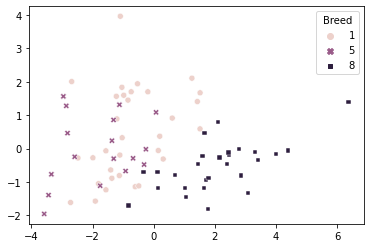

In [21]:
sns.scatterplot(x = x_reduced[:,0], y = x_reduced[:,1],# x는 pc1, # y는 pc2
               hue = data.Breed,
               style = data.Breed)
plt.show()

In [22]:
data.dtypes

Breed         int64
SalePr        int64
YrHgt       float64
FtFrBody      int64
PrctFFB     float64
Frame         int64
BkFat       float64
SaleHt      float64
SaleWt        int64
dtype: object

- Breed 값이 수치형 변수이므로, 값의 색이 차이가 별로 나지 않음

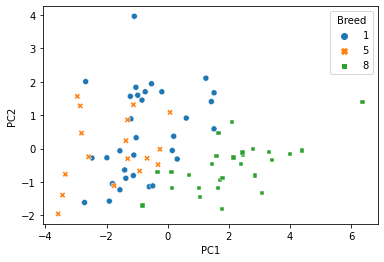

In [23]:
sns.scatterplot(x = x_reduced[:,0], y = x_reduced[:,1],
               hue = data.Breed.astype('category'),
               style = data.Breed)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- 오른쪽에 치우친 소는 근육질 소로 추정되고, 위쪽에 치우친 소는 작지만 fat이 많은 소로 추정된다.
- 소의 종에 따라서 특징이 나름대로 그룹핑이 되는 것처럼 보인다.
- 8번종의 경우에는 PC1의 값이 크다. 상대적으로 PC2는 작은 편이나 깔끔하게 떨어지지 않는다.
- 1번종의 경우에는 사이즈가 중간이고, PC2관점에서는 구분이 되지 않는다.
- 7차원의 자료를 2차원에 표현하면서 그룹핑이 되는 지에 효과를 볼 수 있으며, 시각적으로 효과적 표현이 가능하다.

In [24]:
data.Breed.astype('category')

0     1
1     1
2     1
3     1
4     1
     ..
71    8
72    8
73    8
74    8
75    8
Name: Breed, Length: 76, dtype: category
Categories (3, int64): [1, 5, 8]

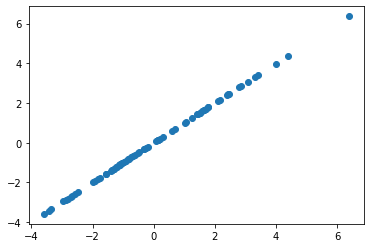

In [25]:
plt.scatter(np.matmul(X_scale, pca.components_[0]), x_reduced[:,0])
plt.show()

In [26]:
np.corrcoef(data.Breed, x_reduced[:,0])

array([[1.        , 0.55530002],
       [0.55530002, 1.        ]])